In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read the Clean Data CSV file
processedData = pd.read_csv('./data/eng_data.csv')

# Ensure correct ordering of catagorical fields
monthOrder = ['January','February','March','April','May','June','July','August','September','October','November','December']

ageGroupOrder = ['20-29','30-39','40-49','50-59', '60+']
processedData['month'] = pd.Categorical(processedData['month'], categories=monthOrder, ordered=True)
processedData['age_group'] = pd.Categorical(processedData['age_group'], categories=ageGroupOrder, ordered=True)

print(processedData.head().to_markdown())


|    | date       | gender   |   age | product_category   |   quantity |   price_per_unit |   total_amount |   year | month    |   day | day_of_week   |   quarter | age_group   |
|---:|:-----------|:---------|------:|:-------------------|-----------:|-----------------:|---------------:|-------:|:---------|------:|:--------------|----------:|:------------|
|  0 | 2023-11-24 | Male     |    34 | Beauty             |          3 |               50 |            150 |   2023 | November |    24 | Friday        |         4 | 30-39       |
|  1 | 2023-02-27 | Female   |    26 | Clothing           |          2 |              500 |           1000 |   2023 | February |    27 | Monday        |         1 | 20-29       |
|  2 | 2023-01-13 | Male     |    50 | Electronics        |          1 |               30 |             30 |   2023 | January  |    13 | Friday        |         1 | 40-49       |
|  3 | 2023-05-21 | Male     |    37 | Clothing           |          1 |              500 |            50

# Univariate Visualizations

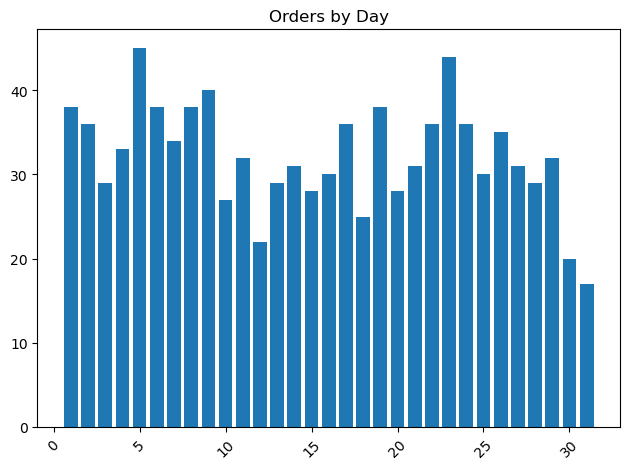

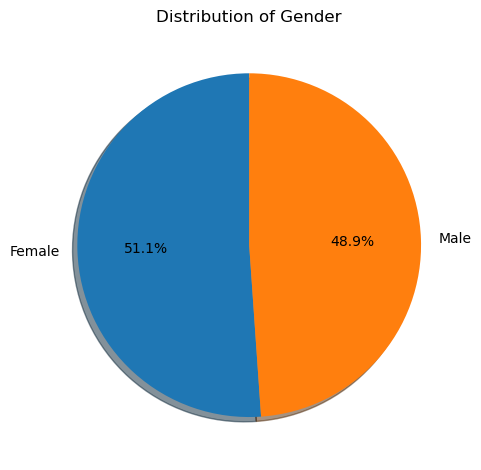

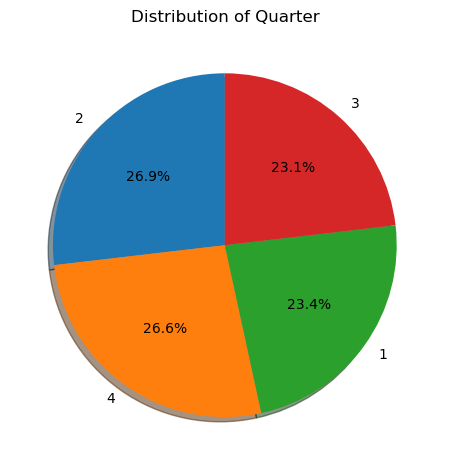

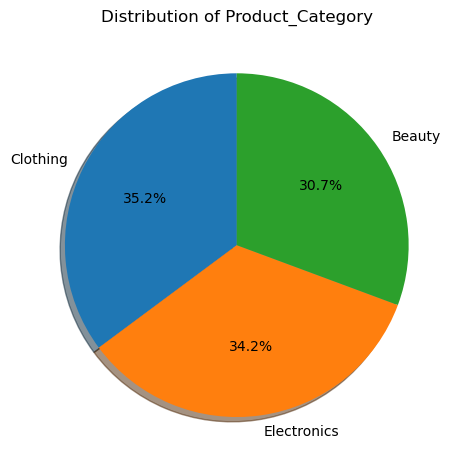

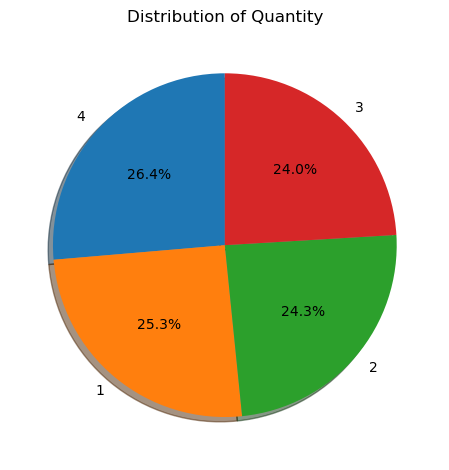

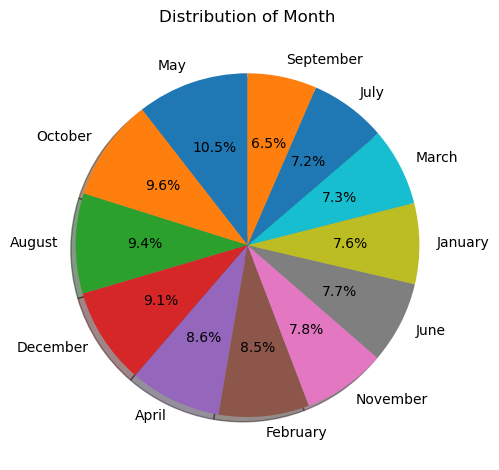

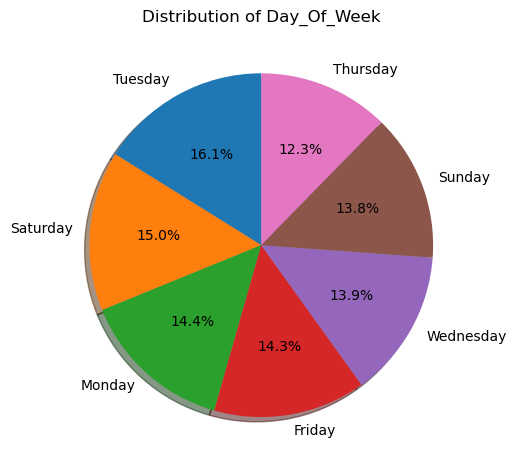

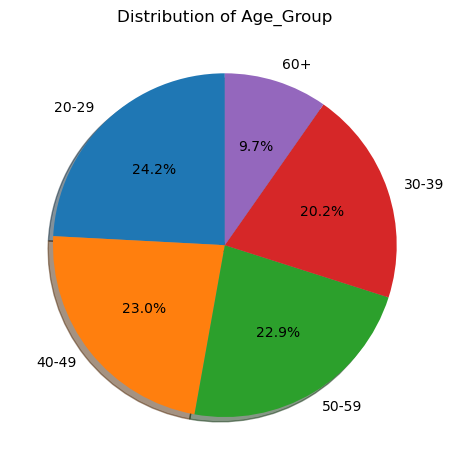

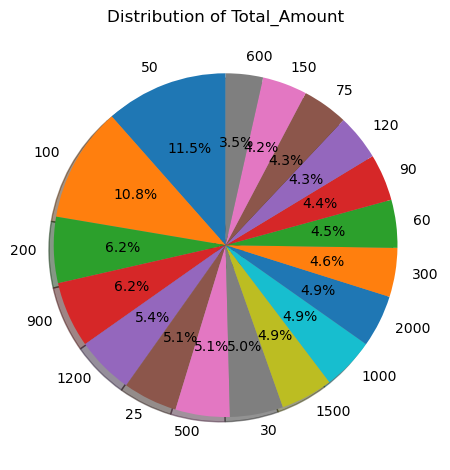

In [3]:
# Univariate Visualizations
barFields = ['day']
for field in barFields:
    values = processedData[field].value_counts()
    plt.bar(values.index, height=values, )
    plt.xticks(rotation=45)
    plt.title('Orders by ' + field.title())
    plt.tight_layout()
    plt.show()



pieFileds = ['gender','quarter', 'product_category','quantity','month','day_of_week','age_group','total_amount']
for field in pieFileds:
    values = processedData[field].value_counts()
    plt.pie(values, labels=values.index,autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Distribution of ' + field.title())
    plt.tight_layout()
    plt.show()




# Bivariate Visualizations

## Bivariate Pairings:

- Gender x Age
- Gender x Quarter
- Gender x Poduct Category
- Gender x Quantity
- Gender x Month
- Gender x Day of Week
- Gender x Age Group
- Gender x Total Amount

- Quarter x Product Category
- Quarter x Quantity
- Quarter x Day of Week
- Quarter x Age Group
- Quarter x Total Amount

- Product Category x Quantity
- Product Category x Month
- Proiduct Category x Day of Week
- Product Category x Age Group
- Product Category x Total Amount

- Quantity x Month
- Quantity x Day of Week
- Quantity x Age Group

- Month x Age Group
- Month x Total Amount

- Age Group x Total Amount

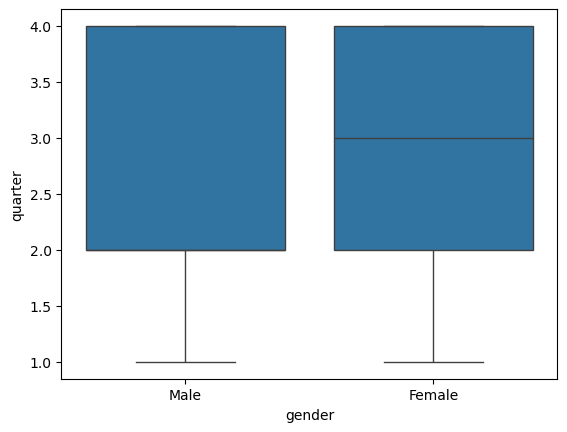

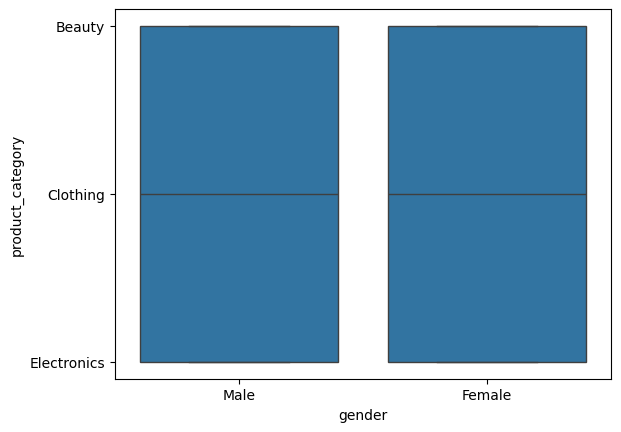

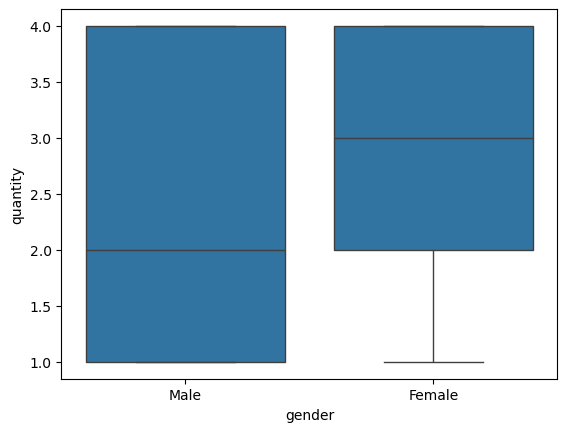

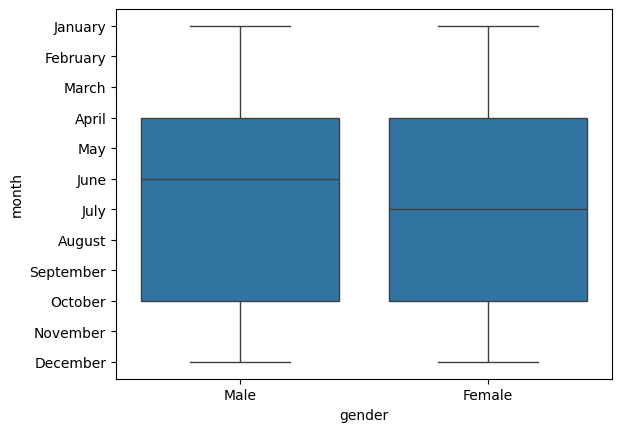

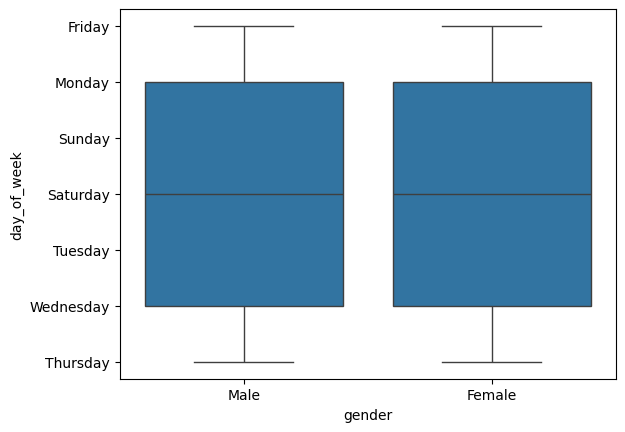

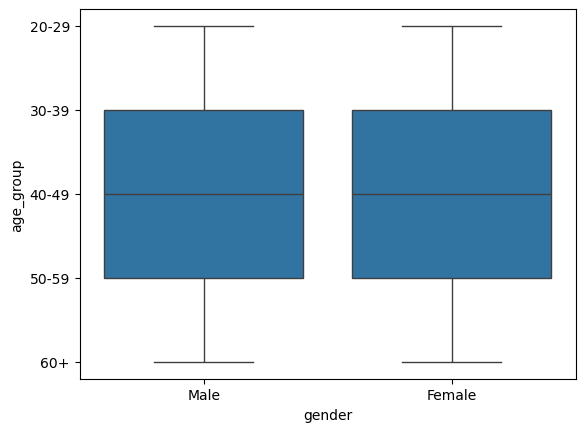

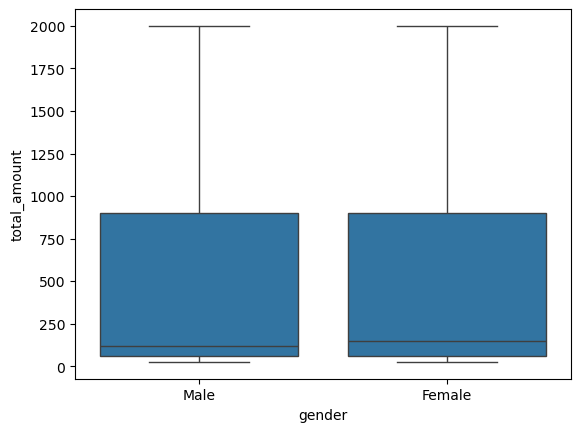

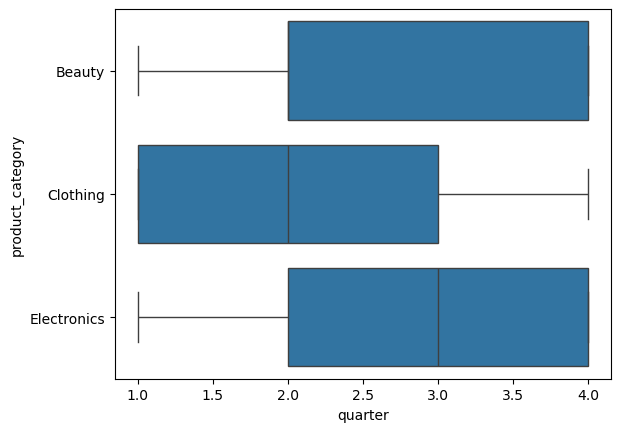

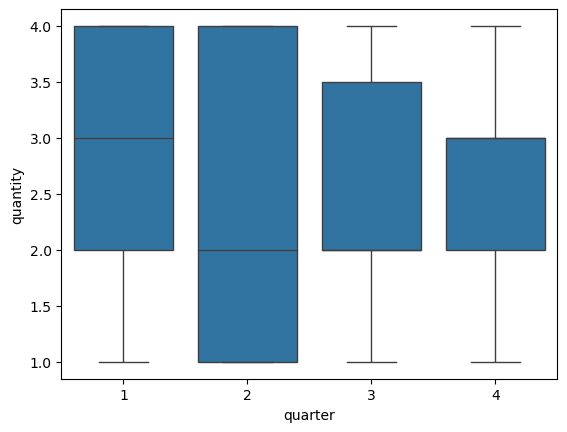

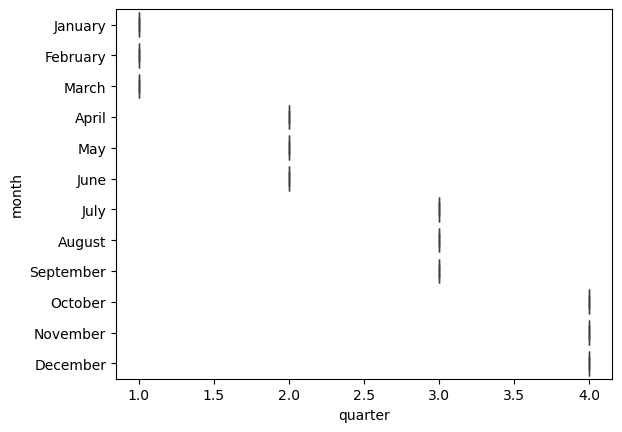

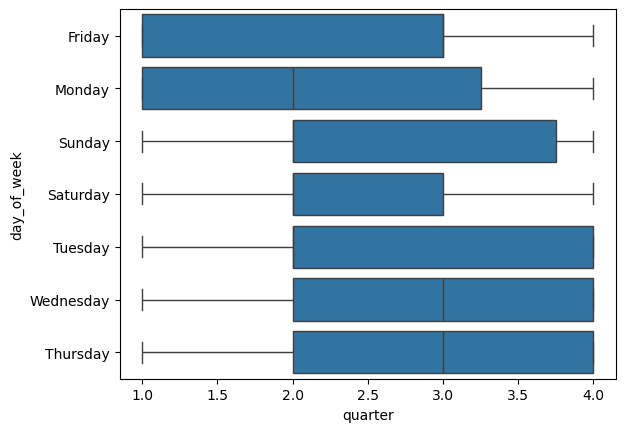

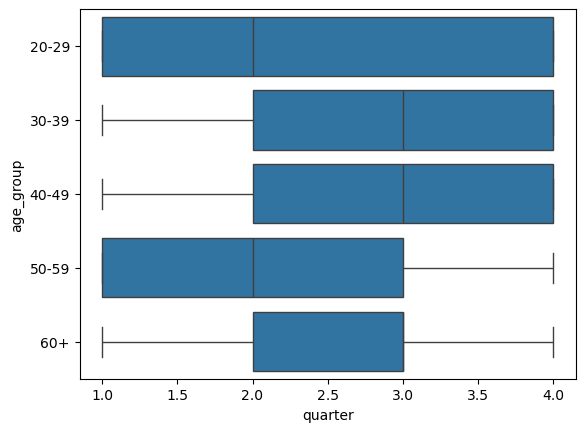

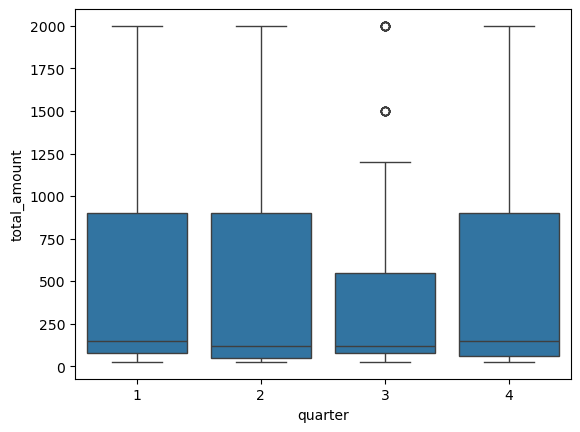

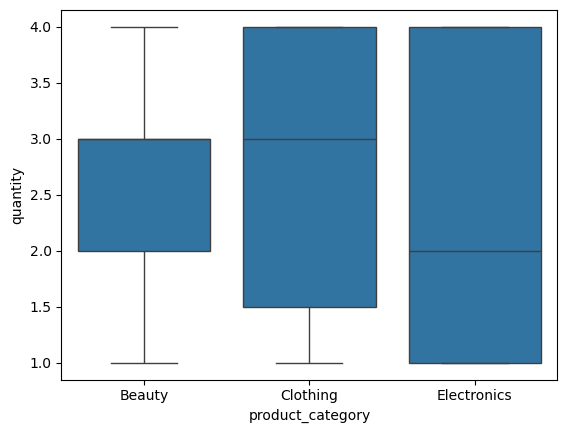

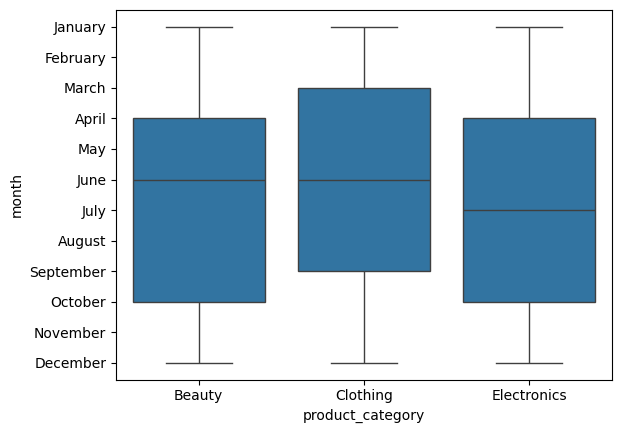

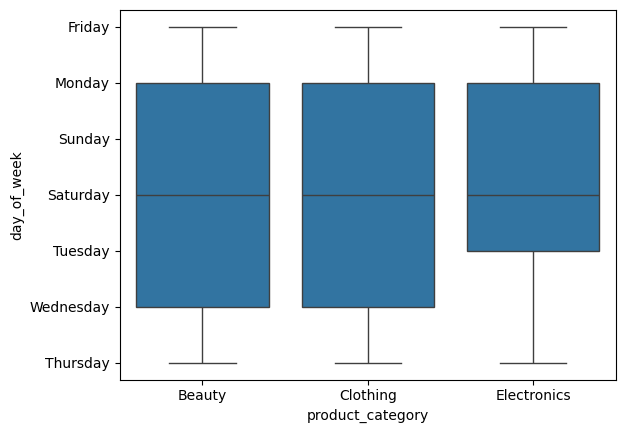

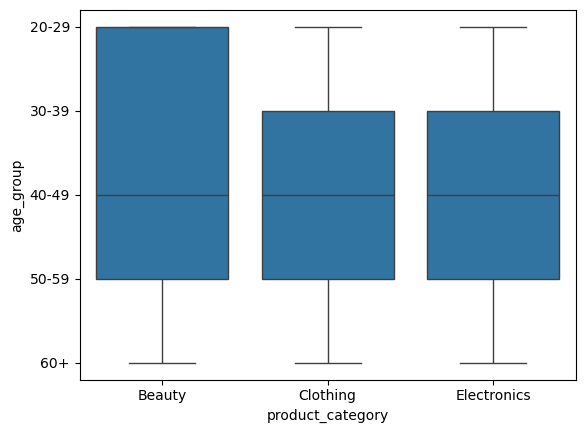

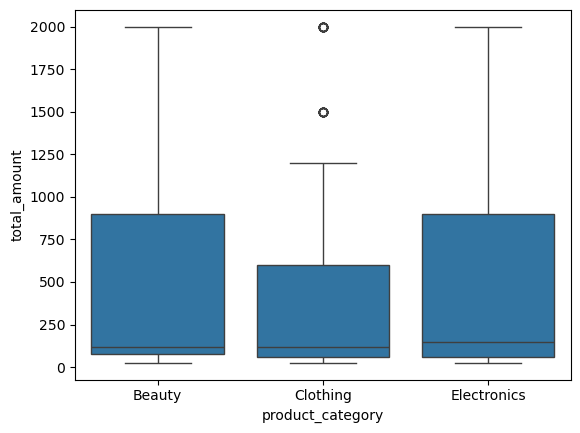

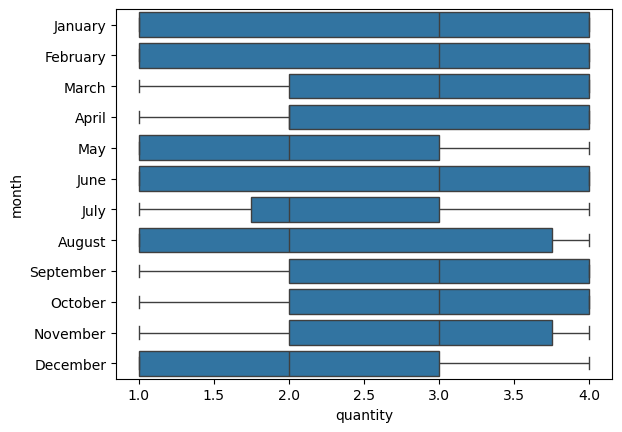

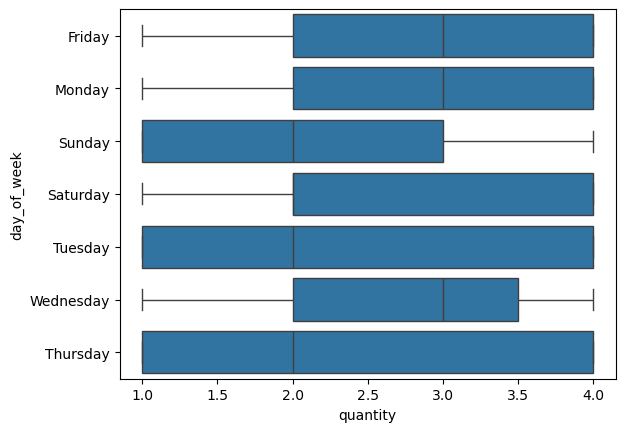

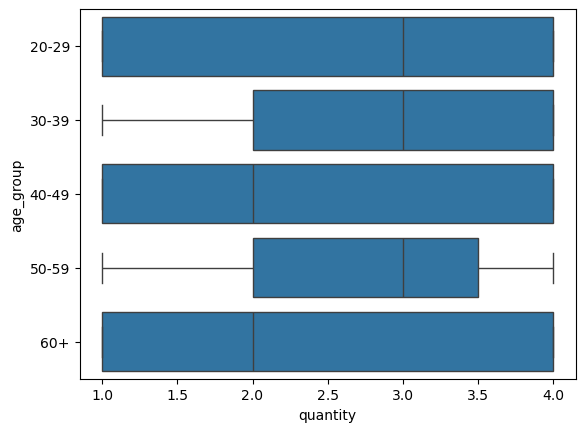

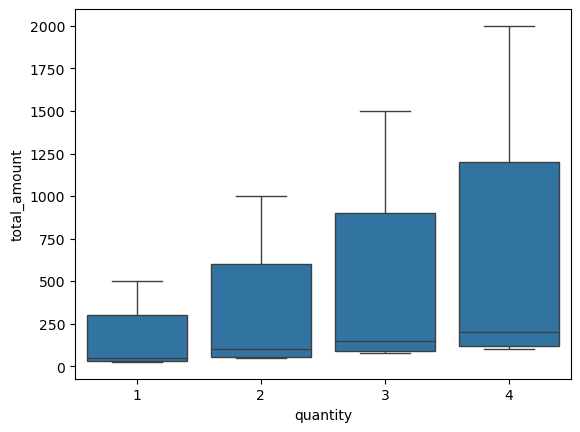

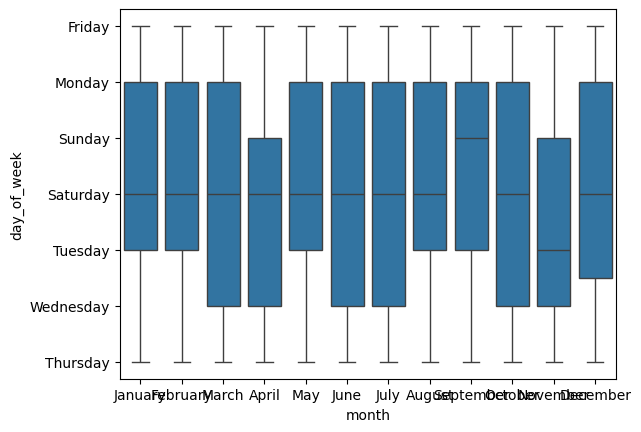

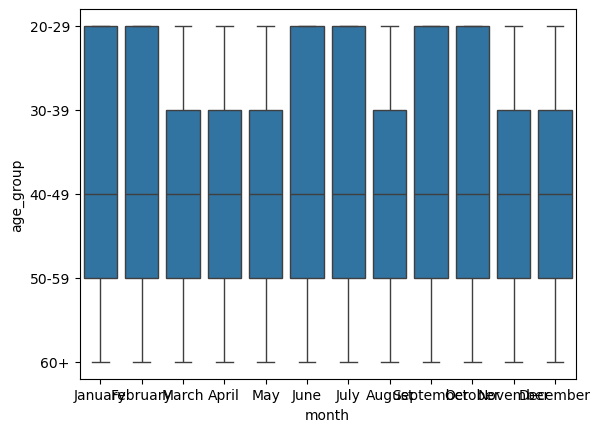

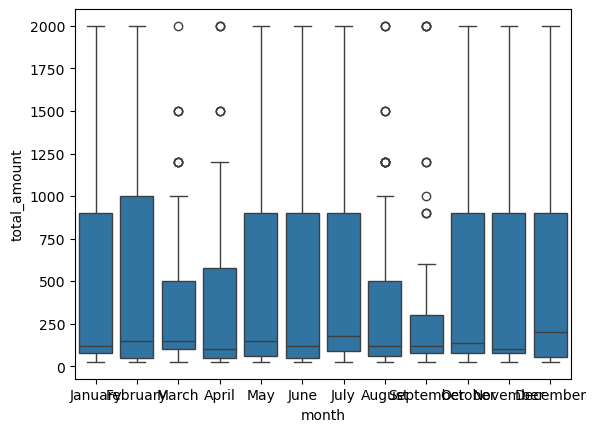

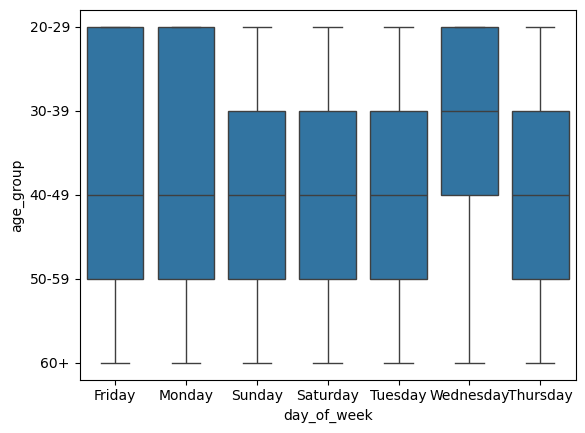

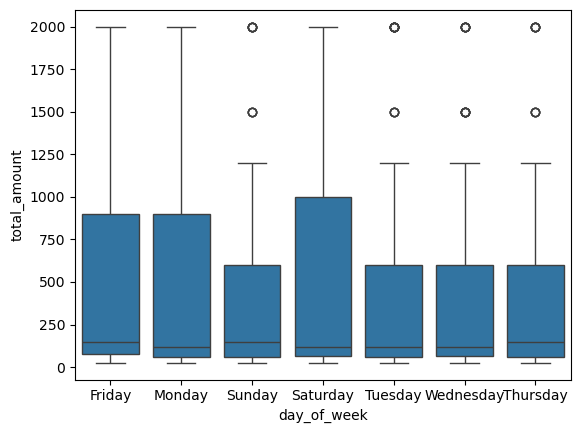

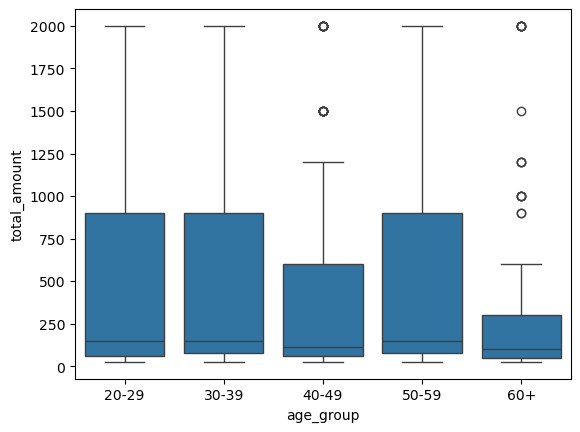

In [4]:
fields = ['gender','quarter', 'product_category','quantity','month','day_of_week','age_group','total_amount']

for i in range(len(fields)+1):
    for j in range(i+1, len(fields)):
        sns.boxplot(data=processedData, x=fields[i], y=fields[j])
        plt.show()

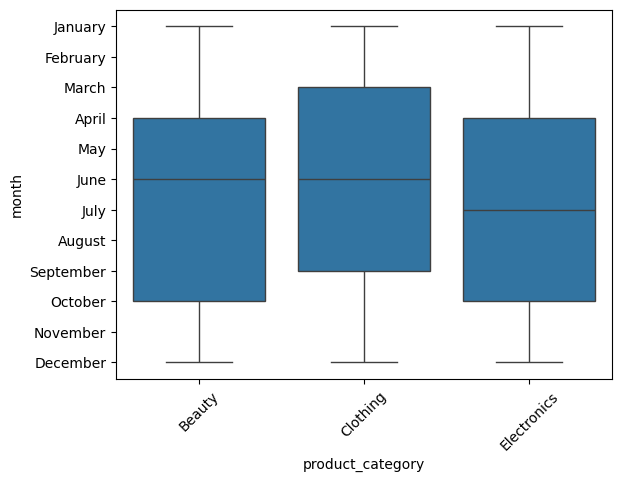

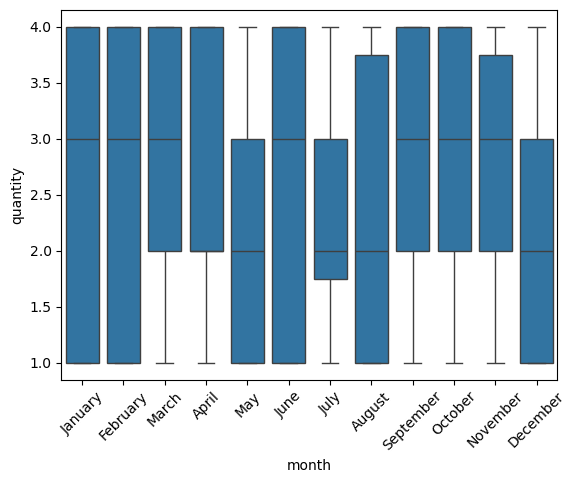

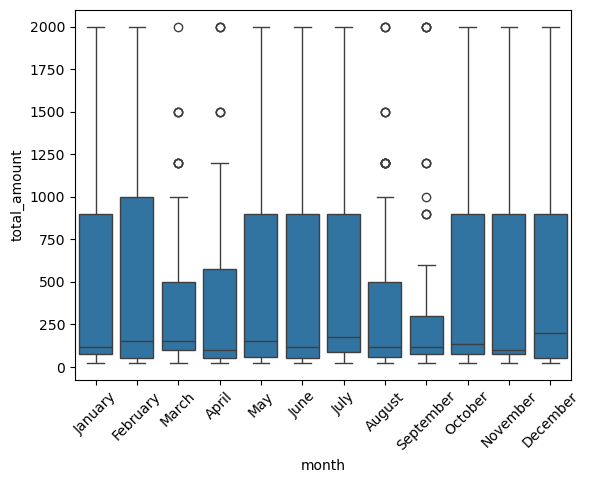

In [22]:
# By Month Bivariate Visuals
fields = [ 'product_category','quantity','age_group','total_amount']

sns.boxplot(processedData, x='product_category', y='month')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(processedData, x='month', y='quantity', order=monthOrder)
plt.xticks(rotation=45)
plt.show()

sns.boxplot(processedData, x='month', y='total_amount', order=monthOrder)
plt.xticks(rotation=45)
plt.show()

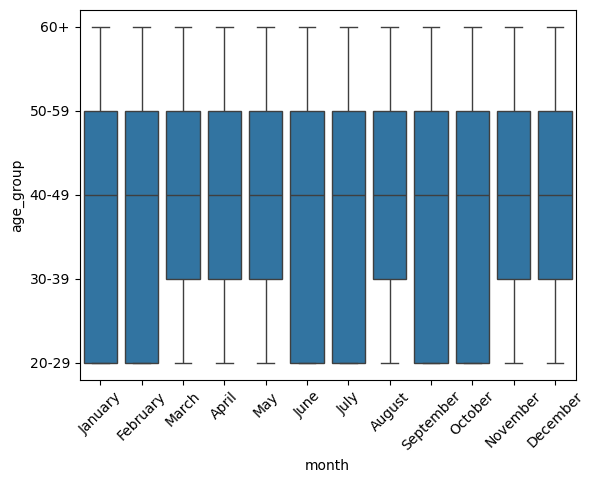

In [6]:
# sns.boxplot(data=processedData, x='month', y='age_group')
sns.boxplot(data=processedData, x='month', y='age_group')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

# sns.boxplot(processedData, x='month', y='age_group', order=monthOrder)
# plt.xticks(rotation=45)
# plt.yticks(range(len(ageGroupOrder)), ageGroupOrder)
# plt.show()

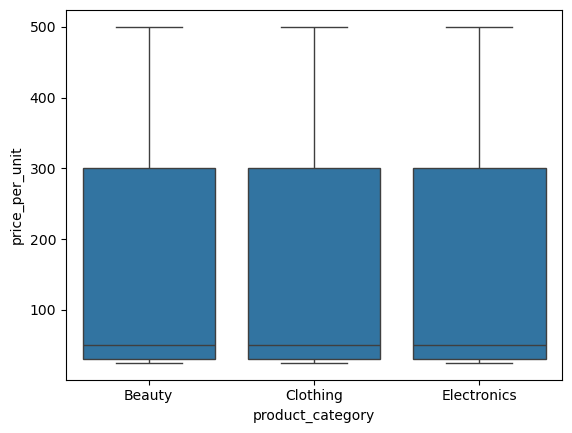

In [7]:
sns.boxplot(data=processedData, x='product_category', y='price_per_unit')
plt.show()

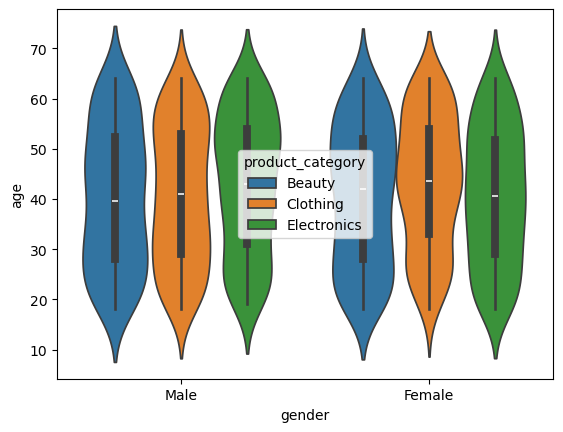

In [8]:
sns.violinplot(data=processedData, x='gender', y='age', hue='product_category', legend=True)
plt.show()

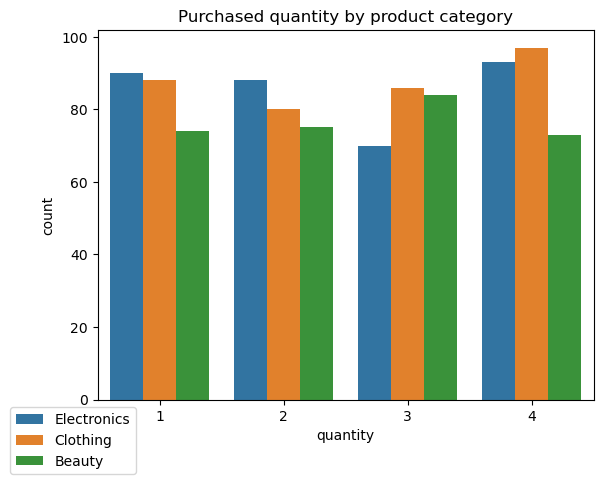

In [9]:
sns.countplot(data=processedData, x='quantity', hue='product_category')
plt.title('Purchased quantity by product category')
plt.legend(loc='lower center', bbox_to_anchor=(-0.05, -0.22))
plt.show()

C:\Users\watso\AppData\Local\Temp\ipykernel_24444\131494557.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = processedData.pivot_table(values='total_amount', index='day_of_week', columns='month', aggfunc='sum')


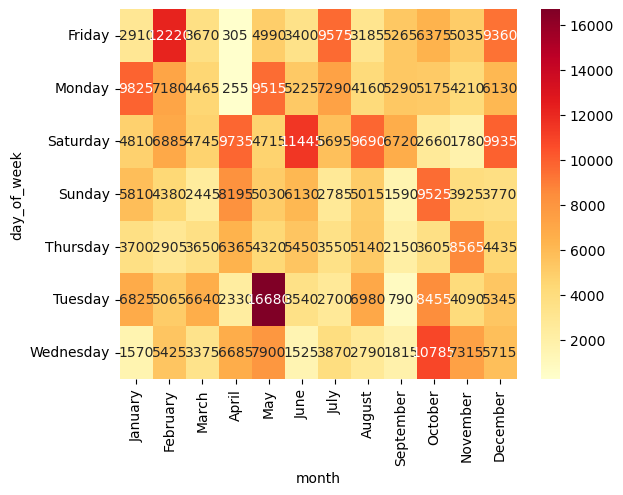

In [10]:
pivot_table = processedData.pivot_table(values='total_amount', index='day_of_week', columns='month', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.show()

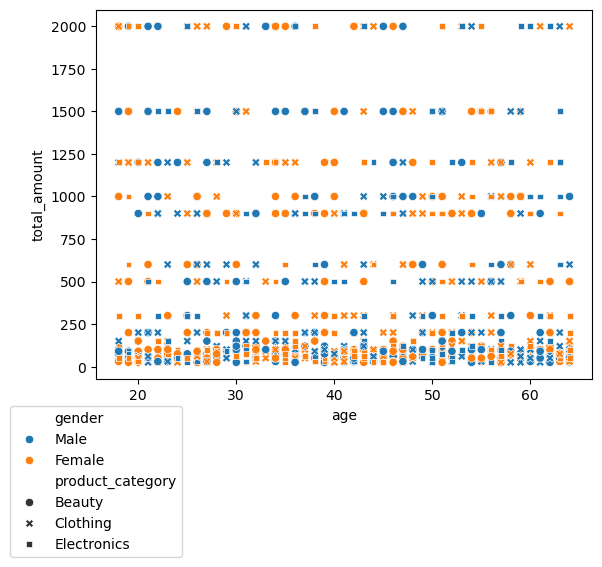

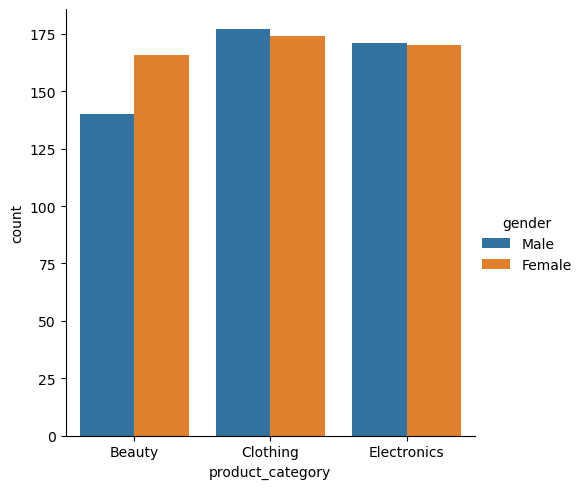

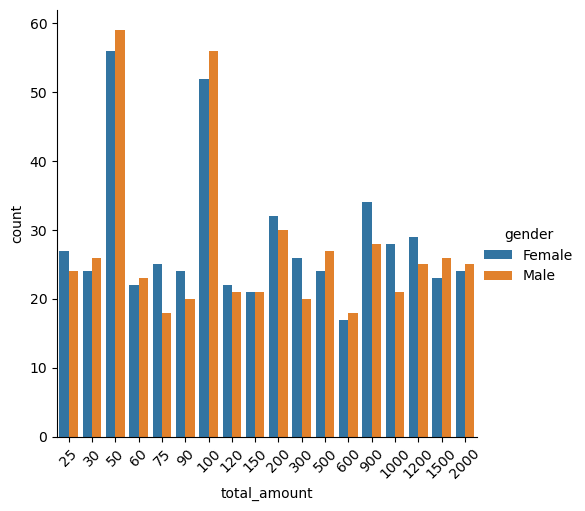

In [11]:
# Age and spending relationship
sns.scatterplot(data=processedData, x='age', y='total_amount', hue='gender', style='product_category')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5))
plt.show()

# Gender distribution across categories
sns.catplot(data=processedData, x='product_category', hue='gender', kind='count')
plt.show()

# Gender distribution across categories
sns.catplot(data=processedData, x='total_amount', hue='gender', kind='count')
plt.xticks(rotation=45)
plt.show()


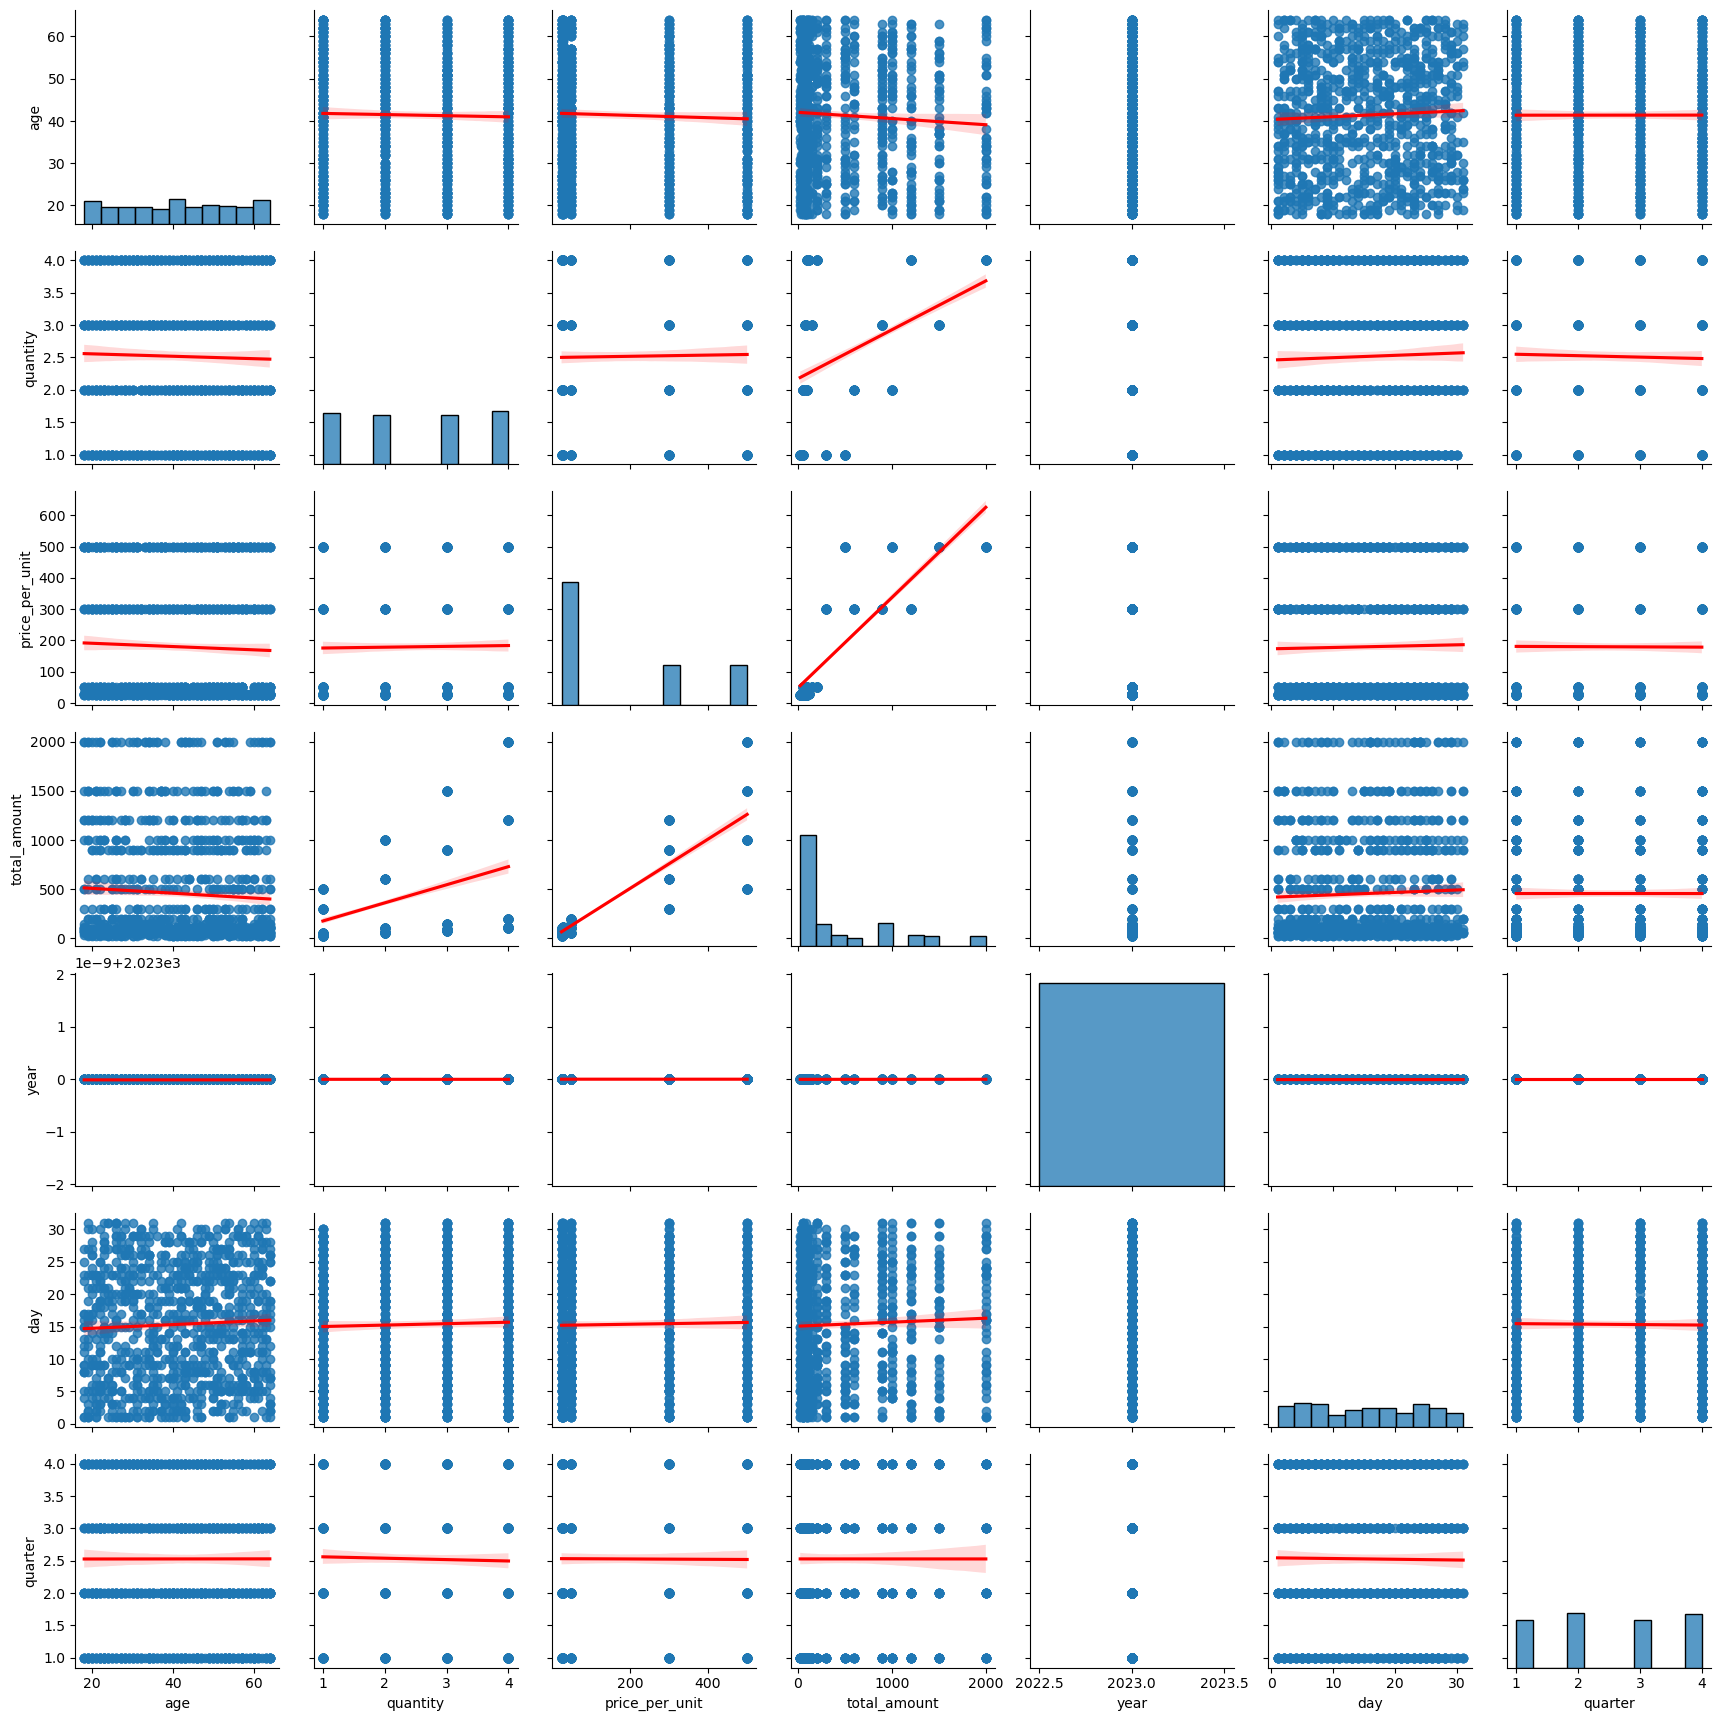

In [12]:
sns.pairplot(processedData, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

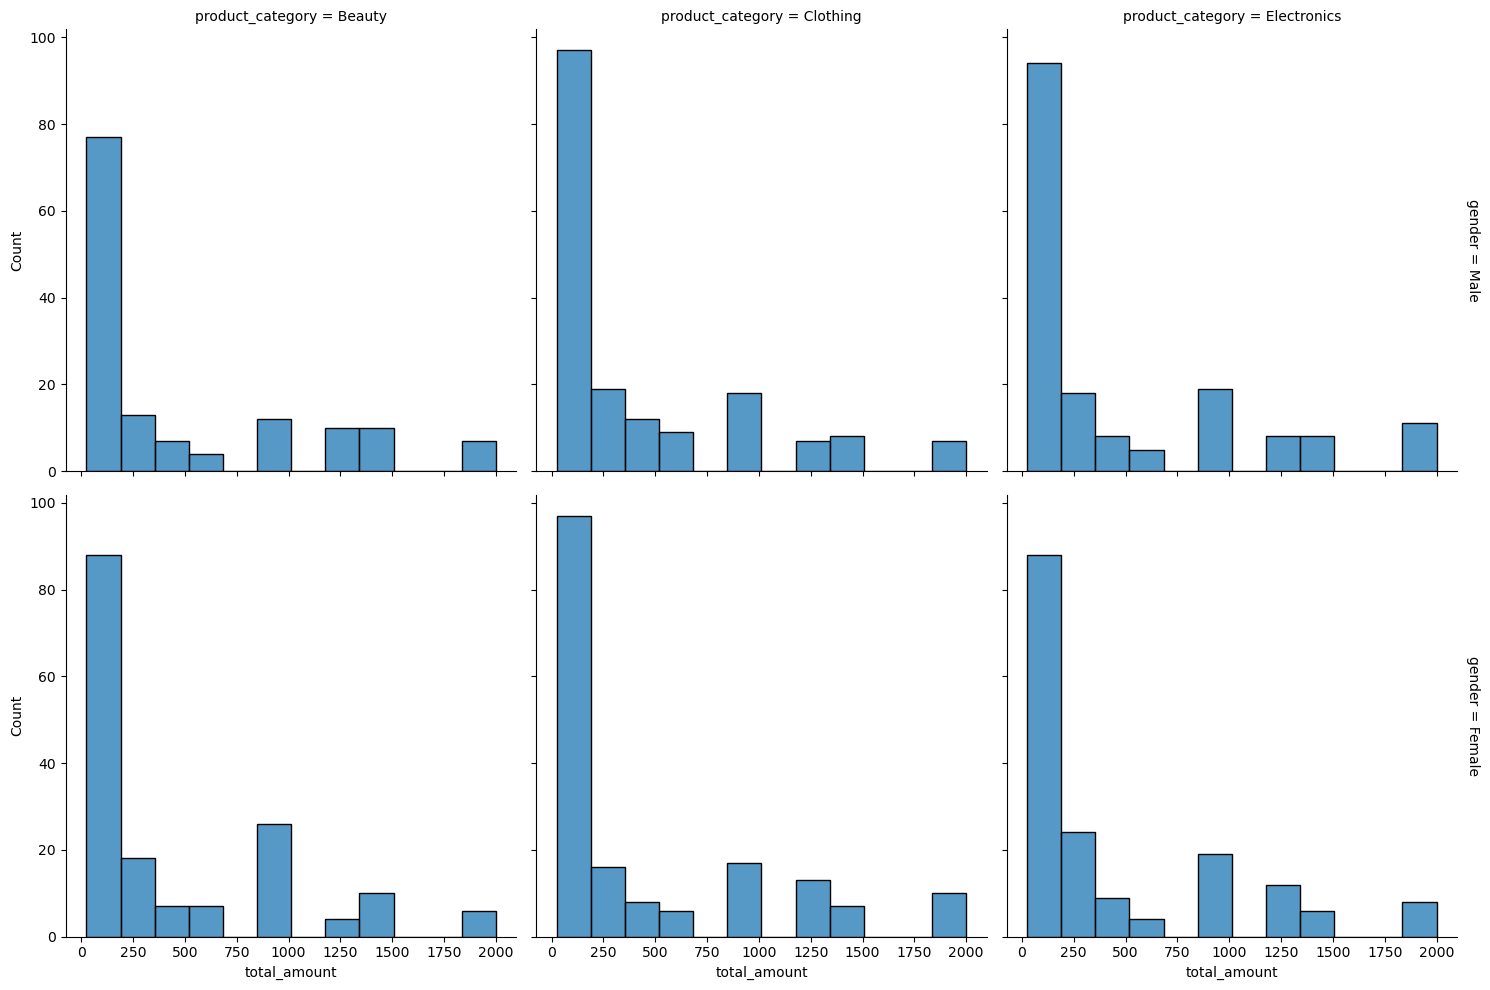

In [13]:
# Total Spend by Gender by Category
sns.displot(processedData, x='total_amount', col='product_category', row='gender', facet_kws=dict(margin_titles=True))

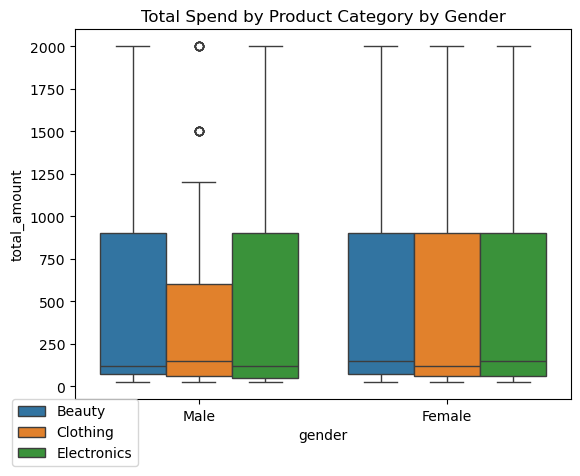

In [14]:
# Total spend per category 
sns.boxplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Product Category by Gender')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.2))
plt.show()


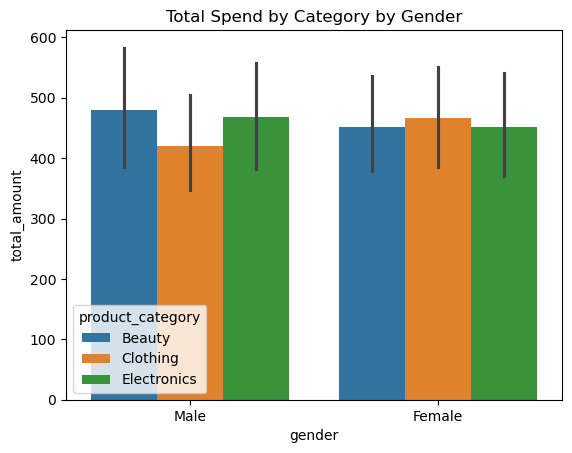

In [15]:
# Total spend per category 
sns.barplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Category by Gender')
plt.show()

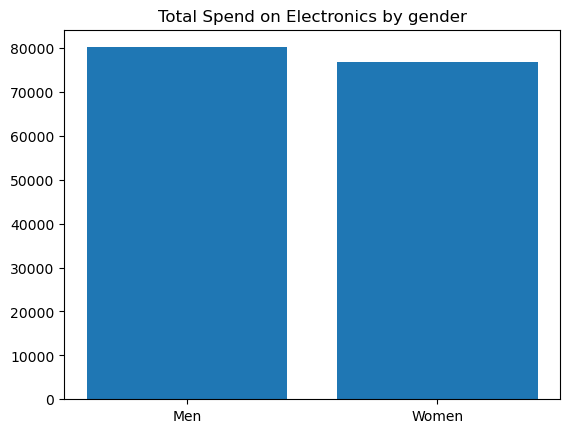

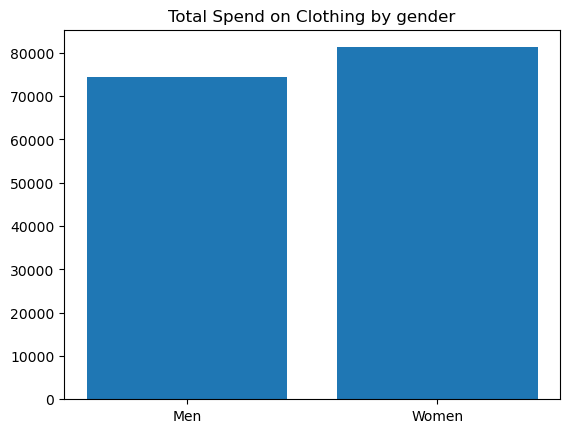

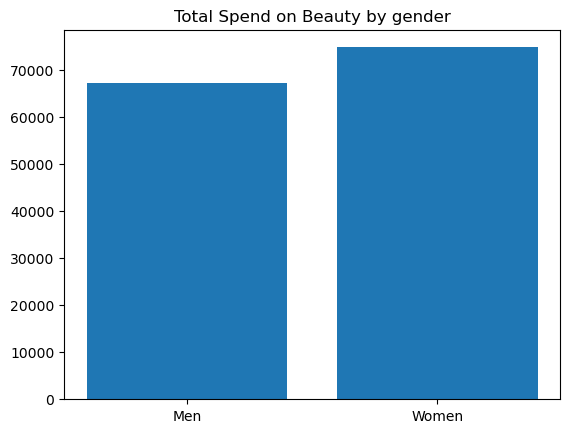

In [16]:
# Raw total spend by category by gender
menDF = processedData[processedData['gender'] == 'Male']
womenDF = processedData[processedData['gender'] == 'Female']

categories = ['Electronics', 'Clothing', 'Beauty']

for category in categories:
    menTotal = menDF[menDF['product_category'] == category]['total_amount'].sum()
    womenTotal = womenDF[womenDF['product_category'] == category]['total_amount'].sum()
    plt.bar(x=['Men', 'Women'], height=[menTotal, womenTotal])
    plt.title('Total Spend on ' + category + ' by gender')
    plt.show()

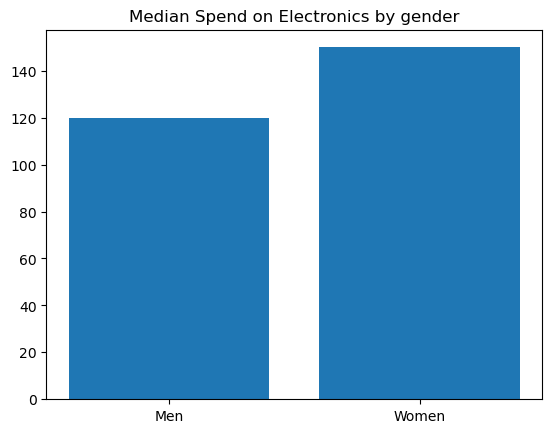

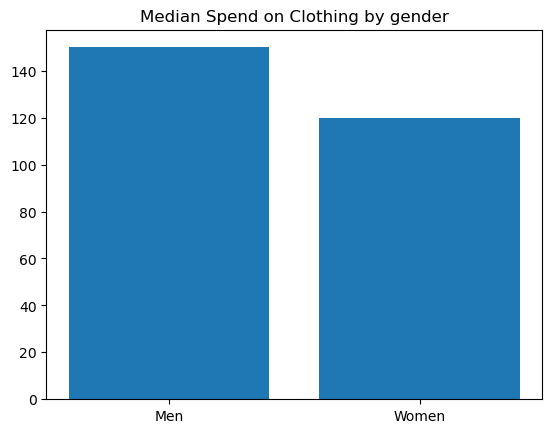

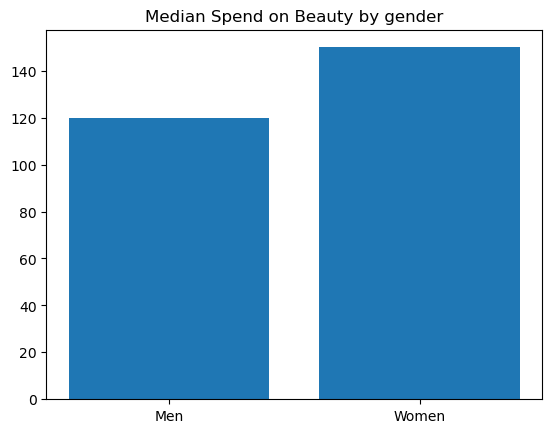

In [25]:
# Raw total spend by category by gender
menDF = processedData[processedData['gender'] == 'Male']
womenDF = processedData[processedData['gender'] == 'Female']

categories = ['Electronics', 'Clothing', 'Beauty']

for category in categories:
    menTotal = menDF[menDF['product_category'] == category]['total_amount'].median()
    womenTotal = womenDF[womenDF['product_category'] == category]['total_amount'].median()
    plt.bar(x=['Men', 'Women'], height=[menTotal, womenTotal])
    plt.title('Median Spend on ' + category + ' by gender')
    plt.show()

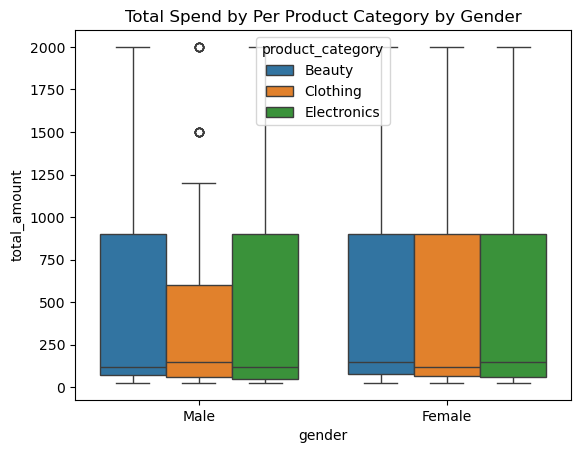

In [ ]:
# Total 
sns.boxplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Product Category by Gender')
plt.show()

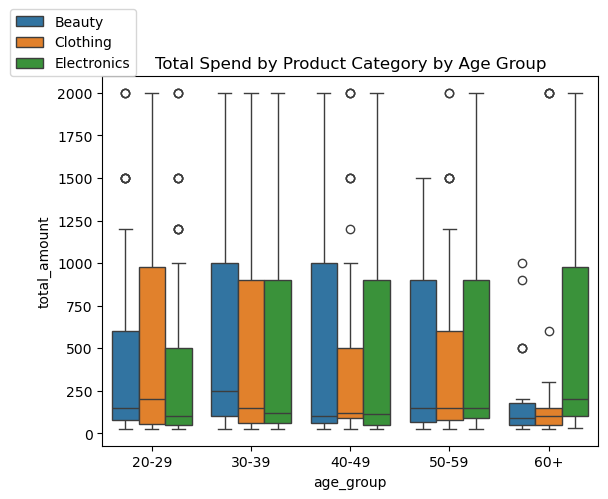

In [27]:
# Total 
sns.boxplot(processedData, x='age_group', y='total_amount', hue='product_category')
plt.title('Total Spend by Product Category by Age Group')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.2))
plt.show()

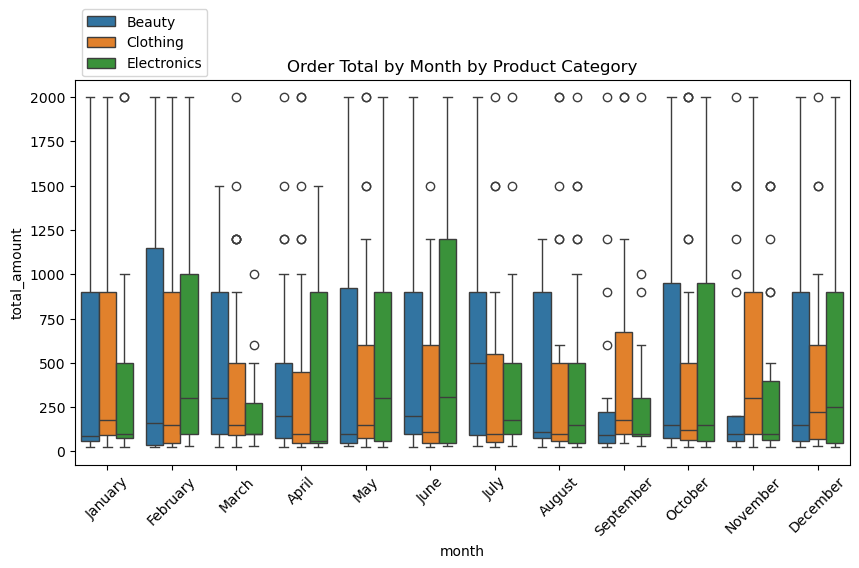

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(processedData, x='month', y='total_amount', hue='product_category')
plt.title('Order Total by Month by Product Category')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))

plt.show()

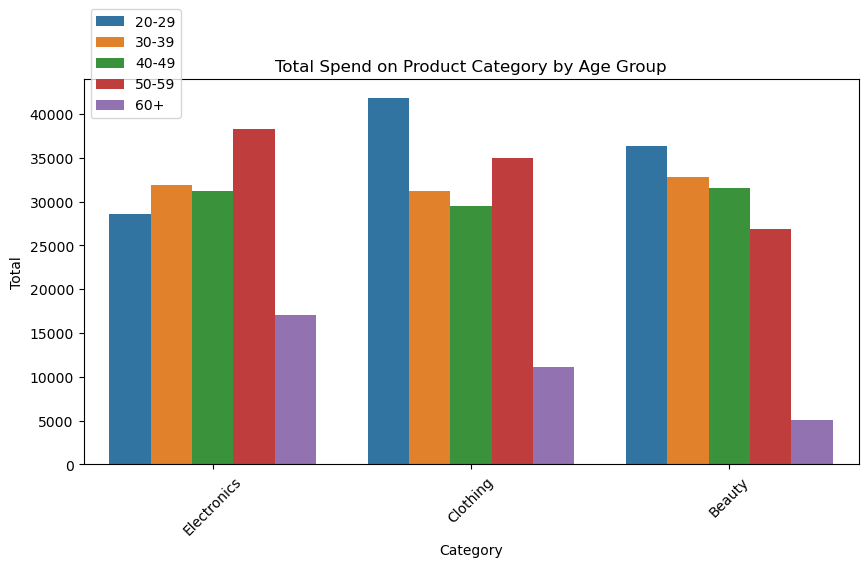

In [77]:
# Total Spend by Cohort by Category
df = pd.DataFrame(columns=['Category','Total','Group'])
for category in categories:
    catData = processedData[processedData['product_category'] == category]
    for group in ageGroupOrder:
        groupData = catData[catData['age_group'] == group]
        newRow = pd.DataFrame.from_dict({ 'Category': [category], 'Total': [groupData['total_amount'].sum()], 'Group':group})
        df = pd.concat([df, newRow])

plt.figure(figsize=(10,5))
sns.barplot(df, x='Category', y='Total', hue='Group')
plt.title('Total Spend on Product Category by Age Group')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))

plt.show()

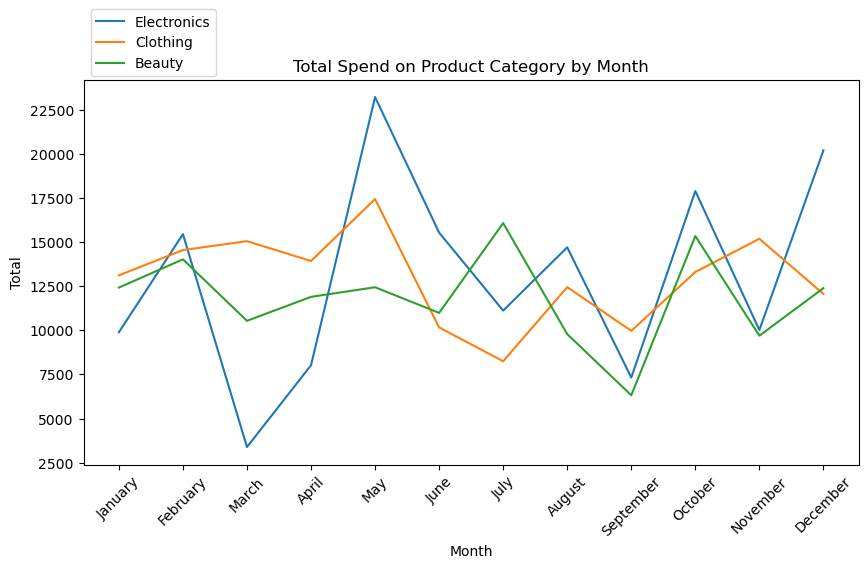

In [78]:
df = pd.DataFrame(columns=['Month','Category','Total'])
for month in monthOrder:
    monthData = processedData[processedData['month'] == month]
    for category in categories:
        catTotal = monthData[monthData['product_category'] == category]['total_amount'].sum()
        newRow = pd.DataFrame.from_dict({'Month': [month], 'Category': [category], 'Total': [catTotal]})
        df = pd.concat([df, newRow])

plt.figure(figsize=(10,5))
sns.lineplot(df, x='Month', y='Total', hue='Category')
plt.title('Total Spend on Product Category by Month')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))

plt.show()

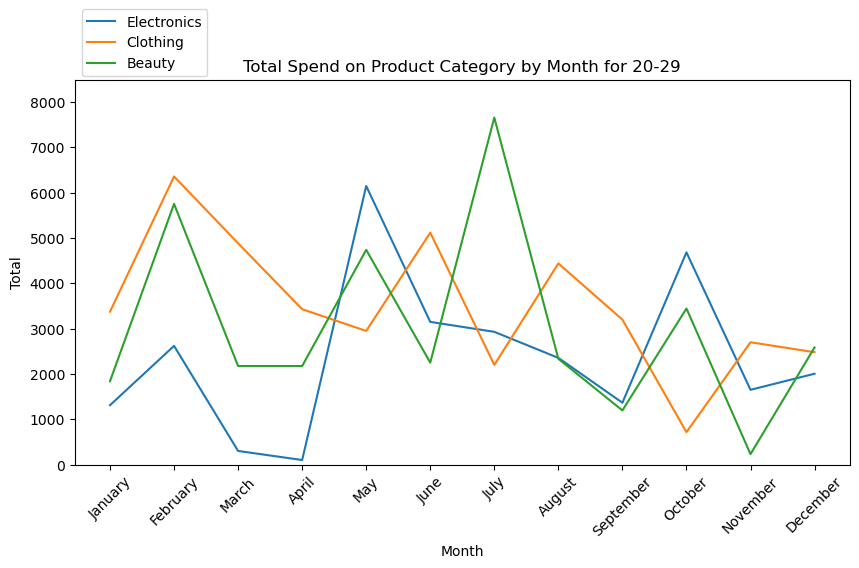

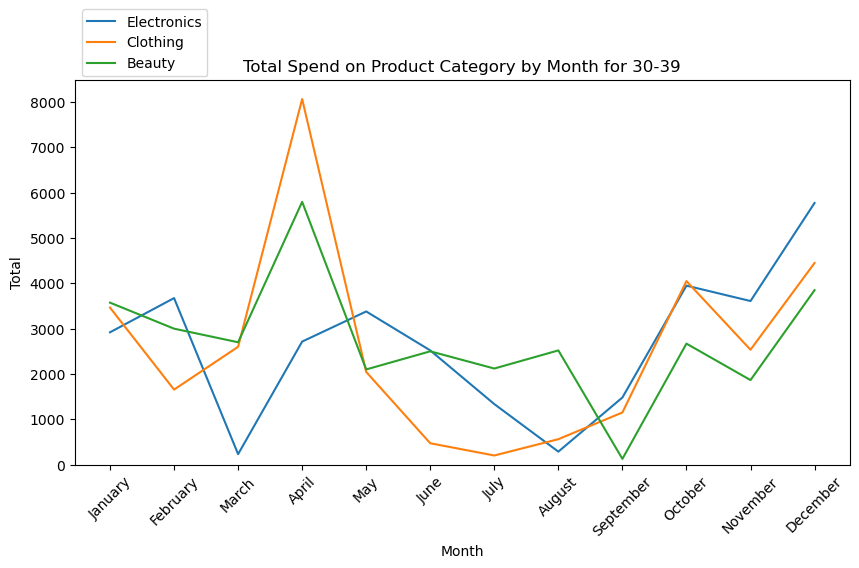

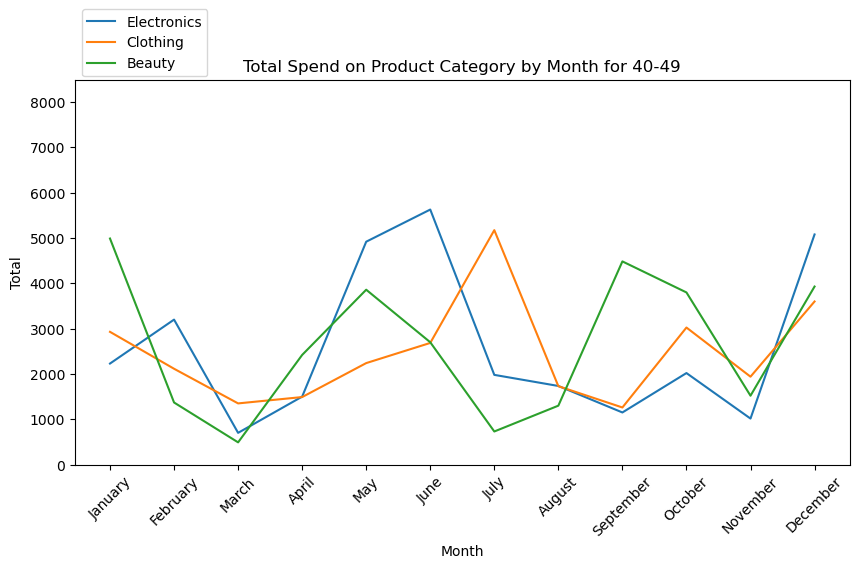

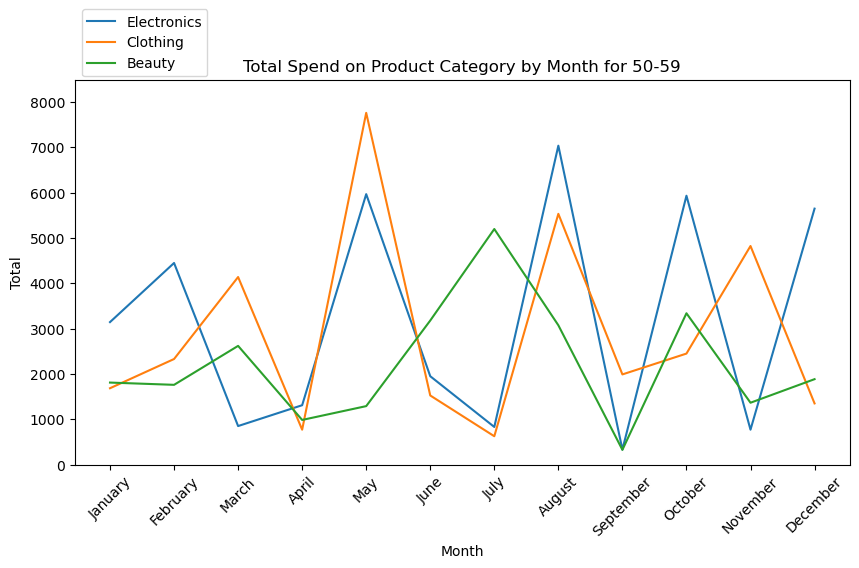

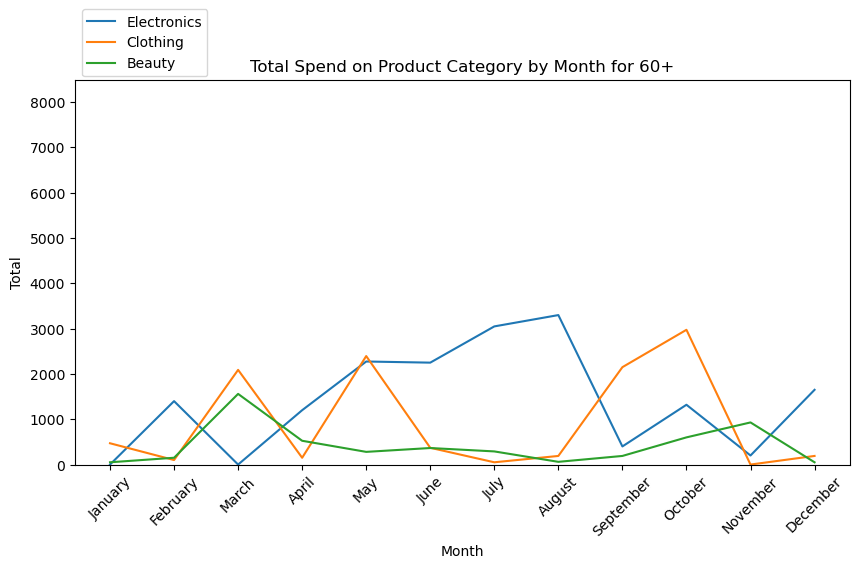

In [72]:
df = pd.DataFrame(columns=['Group','Month','Category','Total'])
for month in monthOrder:
    monthData = processedData[processedData['month'] == month]
    for category in categories:
        catData = monthData[monthData['product_category'] == category]
        for group in ageGroupOrder:    
            groupData = catData[catData['age_group'] == group]
            newRow = pd.DataFrame.from_dict({'Group': [group], 'Month': [month], 'Category': [category], 'Total': [groupData['total_amount'].sum()]})
            df = pd.concat([df, newRow])

for group in ageGroupOrder:
    groupData = df[df['Group'] == group]
    plt.figure(figsize=(10,5))
    plt.ylim(0,8500)
    sns.lineplot(groupData, x='Month', y='Total', hue='Category')
    plt.title('Total Spend on Product Category by Month for ' + group)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))

    plt.show()

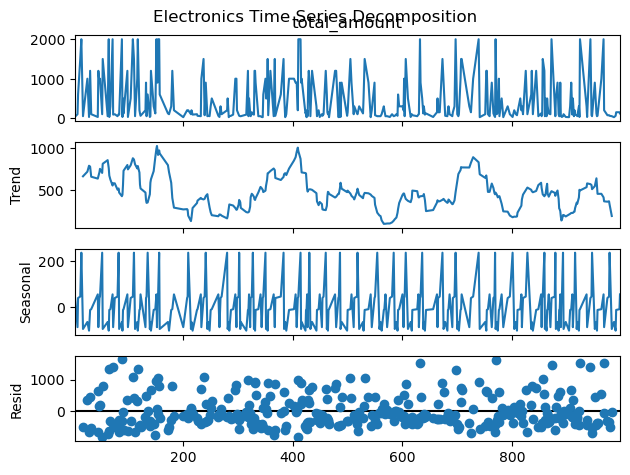

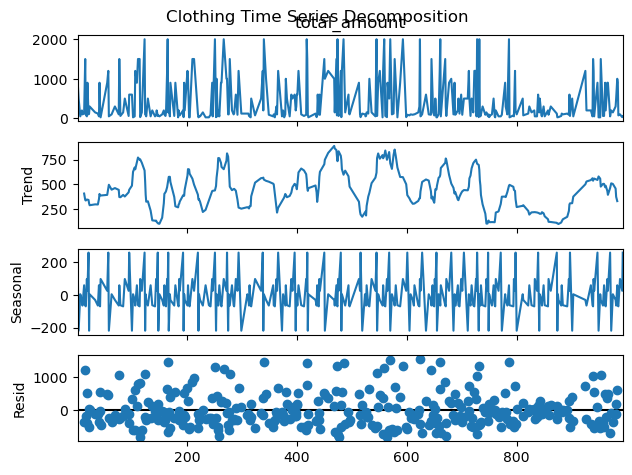

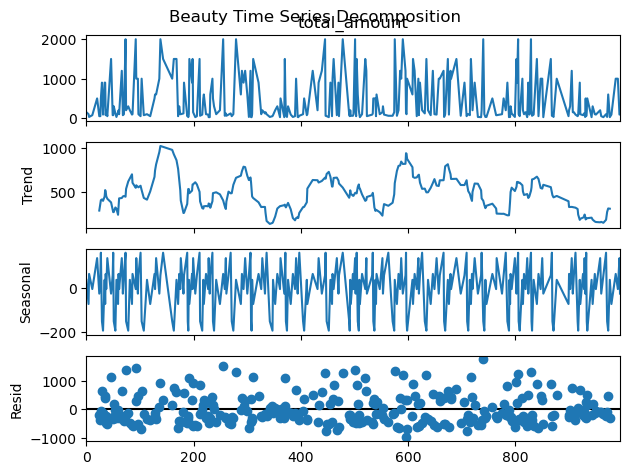

In [55]:
for category in ['Electronics', 'Clothing', 'Beauty']:
    res = sm.tsa.seasonal_decompose(processedData[processedData['product_category'] == category]['total_amount'], period=10, )
    resplot = res.plot()
    resplot.suptitle(category + ' Time Series Decomposition')
    plt.show()